In [1]:
#Definsi parameter 
import tensorflow as tf
import pathlib as pl
tinggi_gambar= 224
lebar_gambar = 224
ukuran_batch = 24
jumlah_class = 5

#Definisi data gambar processing
train_gen = tf.keras.utils.image_dataset_from_directory(
    pl.Path("dataset/datasetolahraga/train"),
    image_size=(tinggi_gambar, lebar_gambar),
    batch_size=ukuran_batch)

val_gen = tf.keras.utils.image_dataset_from_directory(
    pl.Path("dataset/datasetolahraga/valid"),
    image_size=(tinggi_gambar, lebar_gambar),
    batch_size=ukuran_batch)

test_gen = tf.keras.utils.image_dataset_from_directory(
    pl.Path("dataset/datasetolahraga/test"),
    image_size=(tinggi_gambar, lebar_gambar),
    batch_size=ukuran_batch)

Found 672 files belonging to 5 classes.
Found 25 files belonging to 5 classes.
Found 25 files belonging to 5 classes.


In [2]:
#nama class
nama_class = train_gen.class_names
print (nama_class)

['arm wrestling', 'fencing', 'rugby', 'surfing', 'water polo']


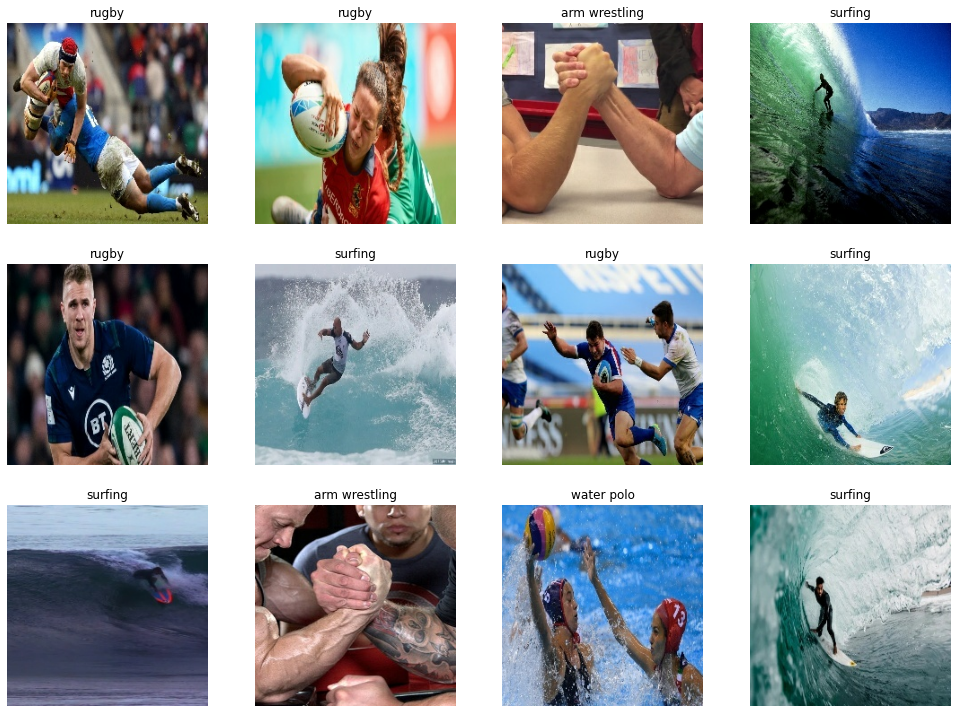

In [3]:
#Contoh data
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 17))
for gambar, label in train_gen.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(gambar[i].numpy().astype("uint8"))
    plt.title(nama_class[label[i]])
    plt.axis("off")

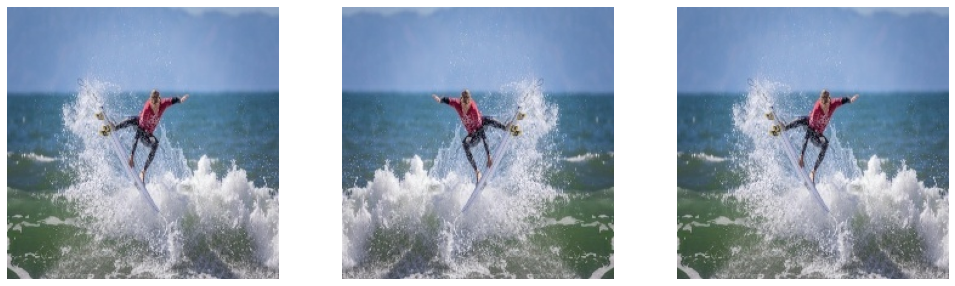

In [4]:
#Augmentasi data
from tensorflow import keras
from tensorflow.keras import layers

augmentasi_data = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(tinggi_gambar, lebar_gambar, 3)),
  ]
)

#Contoh data diaugmentasi
plt.figure(figsize=(17, 17))
for gambar, _ in train_gen.take(1):
  for i in range(3):
    augmentasi = augmentasi_data(gambar)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmentasi[0].numpy().astype("uint8"))
    plt.axis("off")

In [5]:
#Buat model learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image


modelklasifikasiolahraga = Sequential([
  augmentasi_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(jumlah_class, activation='softmax')
])


In [6]:
#compile model
modelklasifikasiolahraga.compile(optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']) 

In [7]:
history = modelklasifikasiolahraga.fit(train_gen, validation_data=val_gen, epochs=24)

Epoch 1/24


C:\Users\laudz\anaconda3\envs\Nabil\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


28/28 [==============================] - 91s 3s/step - loss: 1.4237 - accuracy: 0.4688 - val_loss: 0.7613 - val_accuracy: 0.7200
Epoch 2/24
28/28 [==============================] - 81s 3s/step - loss: 0.8072 - accuracy: 0.6964 - val_loss: 0.6515 - val_accuracy: 0.7600
Epoch 3/24
28/28 [==============================] - 62s 2s/step - loss: 0.5037 - accuracy: 0.8378 - val_loss: 0.4535 - val_accuracy: 0.7600
Epoch 4/24
28/28 [==============================] - 54s 2s/step - loss: 0.3710 - accuracy: 0.8735 - val_loss: 0.3022 - val_accuracy: 0.8800
Epoch 5/24
28/28 [==============================] - 53s 2s/step - loss: 0.2815 - accuracy: 0.9048 - val_loss: 0.4014 - val_accuracy: 0.8000
Epoch 6/24
28/28 [==============================] - 56s 2s/step - loss: 0.2626 - accuracy: 0.9271 - val_loss: 0.2734 - val_accuracy: 0.8400
Epoch 7/24
28/28 [==============================] - 58s 2s/step - loss: 0.2090 - accuracy: 0.9330 - val_loss: 0.3539 - val_accuracy: 0.8000
Epoch 8/24
28/28 [=============

In [10]:
modelklasifikasiolahraga.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [13]:
#Pengujian data  data test dan data tambahan
import numpy as np
gambar_folder = pl.Path("dataset/datasetolahraga/test/arm wrestling/1.jpg")

gambar = tf.keras.utils.load_img(gambar_folder, target_size=(tinggi_gambar, lebar_gambar))
gambar_toarray = tf.keras.utils.img_to_array(gambar)
gambar_toarray = tf.expand_dims(gambar_toarray, 0) 

prediksi = modelklasifikasiolahraga.predict(gambar_toarray)
presentase = tf.nn.softmax(prediksi[0])
model = tf.keras.models.load_model('ModelKlasifikasiOlahraga.h5')
print("Diklasifikasikan Jenis Olahraga {} "
      .format(nama_class[np.argmax(presentase)]))



Diklasifikasikan Jenis Olahraga arm wrestling 


In [14]:
modelklasifikasiolahraga.save('ModelKlasifikasiOlahraga.h5')